# Machine Learning Algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import pylab as pl
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\Mahesh\Downloads\DATA SCIENCE COURSE\Data\Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

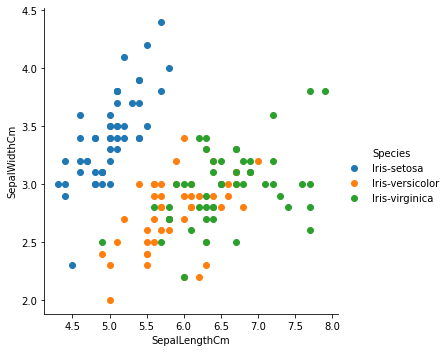

In [7]:
sns.FacetGrid(data,hue='Species',height=5)\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

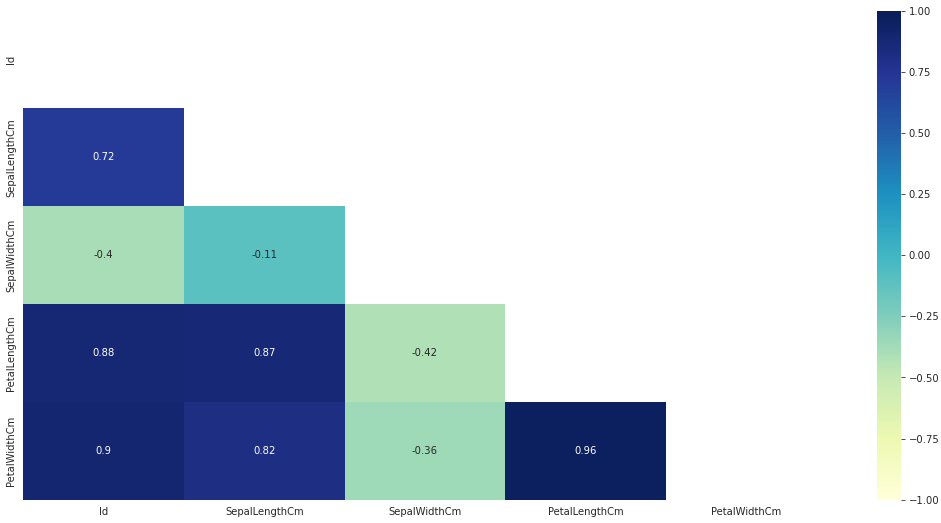

In [8]:
num_corr = data.corr()

mask = np.zeros_like(num_corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(num_corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

# Prepare Train and Test

In [9]:
X = data.iloc[:, :-1].values    #   X -> Feature Variables
y = data.iloc[:, -1].values #   y ->  Target

In [10]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Algorithm 1: Linear Regression

In [11]:
#converting object data type into int data type using labelEncoder for Linear reagration in this case

XL = data.iloc[:, :-1].values    #   X -> Feature Variables
yL = data.iloc[:, -1].values #   y ->  Target

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train= le.fit_transform(yL)

print(Y_train)  # this is Y_train categorical to numerical

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [12]:
# This is only for Linear Regression 
X_trainL, X_testL, y_trainL, y_testL = train_test_split(XL, Y_train, test_size = 0.3, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(X_trainL,y_trainL)
y_pred=lr.predict(X_testL)

In [14]:
from sklearn import metrics
#calculating the residuals

print("y-intercept:                      ", lr.intercept_)
print("Coefficients                      ", lr.coef_)
print("Mean Absolute Error (MAE)         ", metrics.mean_absolute_error(y_testL, y_pred))
print("Mean Square Root Error(MSE)       ", metrics.mean_squared_error(y_testL, y_pred))
print("Root Mean Square Root Error(RMSE) ", np.sqrt(metrics.mean_squared_error(y_testL, y_pred)))
print("r2 value                          ",metrics.r2_score(y_testL,y_pred))


y-intercept:                       -0.02429852351984696
Coefficients                       [ 0.00680677 -0.10726764 -0.00624275  0.22428158  0.27196685]
Mean Absolute Error (MAE)          0.1496683549052497
Mean Square Root Error(MSE)        0.032554517379698125
Root Mean Square Root Error(RMSE)  0.18042870442282216
r2 value                           0.9446026069799255


# Algorithm 2: Decision Tree    

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

In [16]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is:',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix
 [[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
accuracy is: 0.9777777777777777


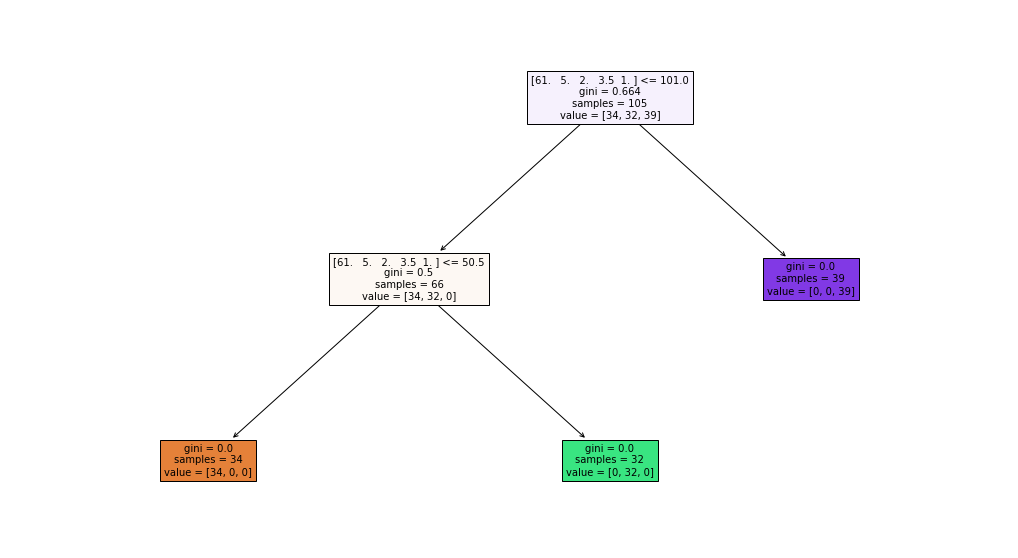

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize = (18,10))
plot_tree(dt, filled=True, fontsize = 10, feature_names = X_train)
plt.show()

# Algorithm 3: Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print("Confusion Matrix\n",confusion_matrix(y_pred,y_test))
#Accuracy Score
print('Accuracy is: ',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
Accuracy is:  1.0


# Algorithm 4: Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

lm= LogisticRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


C:\Users\Mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Algorithm 5: K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


# Algorithm 5: Naive Bayes 

In [21]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = Model.predict(X_test)

In [23]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype='<U15')

In [24]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


# Algorithm 7- Support Vector Machines

In [25]:
# Support Vector Machine
from sklearn.svm import SVC

Model = SVC()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

In [26]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score

print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy is 1.0


# Algorithm 8- K- means 


In [27]:
x = data.iloc[:, [1, 2, 3, 4]].values

In [28]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\Mahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


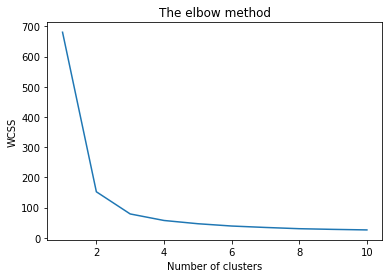

In [29]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()


In [30]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [31]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

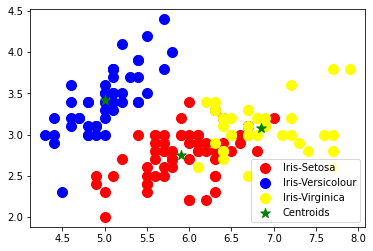

In [32]:
#Visualising the clusters

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-Versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-Virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'green', label = 'Centroids',marker='*')

plt.legend()